<a href="https://colab.research.google.com/github/Vengadore/Varios/blob/master/Autoencoders_for_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demostración del uso de un autoencoder para el filtrado

In [ ]:
# Importamos algunas librerias utiles y herramientas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
## Para este caso usaremos el dataset de mnist que contiene imagenes de 28x28 de números escritos a mano
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


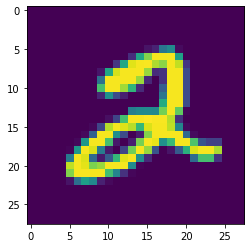

In [4]:
# Este es un elemento del set de entrenamiento
plt.imshow(X_train[5])

In [5]:
## Reescalamiento de los datos entre 0 y 1
X_train = X_train/255.
X_test = X_test/255.

In [6]:
## Importación de las capas de la red
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

El *encoder* se encarga de reducir las dimensiones de la información de entrada. Por ejemplo, en este caso se tienen $28 \times 28$ características en la entrada que se van reduciendo conforme avanza la red, entre más profunda las características menos importantes se van descartando para sólo mantener las más significativas. 

In [7]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))
encoder.add(Dense(400,activation = "relu"))
encoder.add(Dense(200,activation = "relu"))
encoder.add(Dense(100,activation = "relu"))
encoder.add(Dense(50,activation = "relu"))
encoder.add(Dense(25,activation = "relu"))

El *decoder* toma las características más significativas, es decir, las que realmente representan a la imagen de entrada y trata de recrear la imagen a la salida. Notese que la salida es una matriz del mismo tamaño de la entrada

In [8]:
decoder = Sequential()
decoder.add(Dense(50,input_shape =[25],activation = "relu"))
decoder.add(Dense(100,activation = "relu"))
decoder.add(Dense(200,activation = "relu"))
decoder.add(Dense(400,activation = "relu"))
decoder.add(Dense(784,activation = "sigmoid"))
decoder.add(Reshape([28,28]))

Uniendo ambas redes se crea un autoencoder

In [9]:
autoencoder = Sequential([encoder,decoder])

In [10]:
autoencoder.compile(loss="binary_crossentropy",
                    optimizer = SGD(lr=1.5),
                    metrics = ['accuracy'])

En este caso los datos de entrenamiento para la entrada $X$ serán la imagen original y al mismo tiempo la salida $y$ será lo mismo que la entrada. 
Lo anterior puede ser interpretado de manera simple como: "toma esta imagen, aprende los datos más importantes de ella y vuelve a crearla".


In [11]:
autoencoder.fit(X_train,X_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2509 - accuracy: 0.0890
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1968 - accuracy: 0.1511
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1654 - accuracy: 0.1941
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1494 - accuracy: 0.2182
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1430 - accuracy: 0.2272
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1372 - accuracy: 0.2330
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1319 - accuracy: 0.2395
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.2446
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1243 - accuracy: 0.2490
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.121

Ahora tomaremos 10 imagenes del set de test (estos nunca han sido vistos por el autoencoder) y haremos que extraiga los datos más importantes y la vuelva a recrear.

In [12]:
passed_images = autoencoder.predict(X_test[:10])

Text(0.5, 1.0, 'Attempted Reconstruction (after autoencoder)')

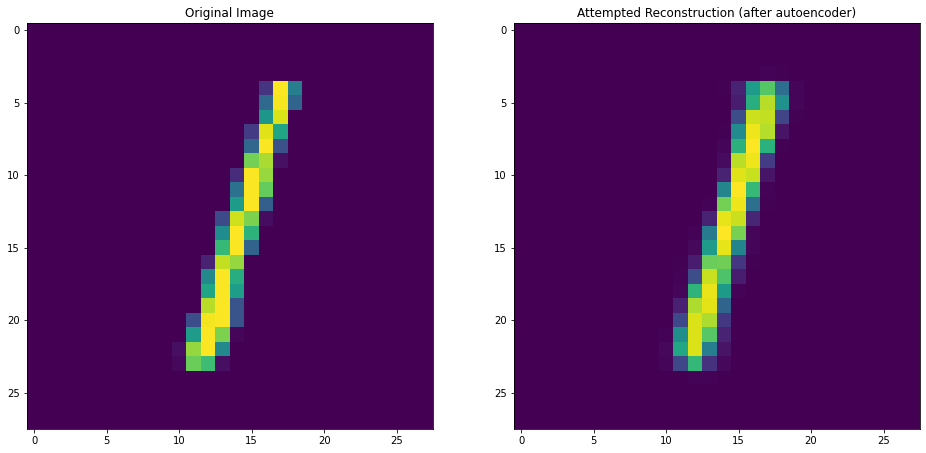

In [13]:
n = 2

fig,axs = plt.subplots(1,2,figsize = (16,8))
axs[0].imshow(X_test[n])
axs[0].set_title("Original Image")

axs[1].imshow(passed_images[n])
axs[1].set_title("Attempted Reconstruction (after autoencoder)")


## Ruido en la imagen

Ahora probemos tomando las imagenes y agregando ruido a dichas imagenes

In [14]:
from tensorflow.keras.layers import GaussianNoise

In [15]:
sample = GaussianNoise(0.2)

In [16]:
noisy = sample(X_test[:10],training = True)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



A la izquierda podemos observar la imagen original y a la derecha la imagen con ruido gaussiano. Aún es posible observar el número pero hay muchas otras cosas pasando en la imagen.

Text(0.5, 1.0, 'NOISE VERSION')

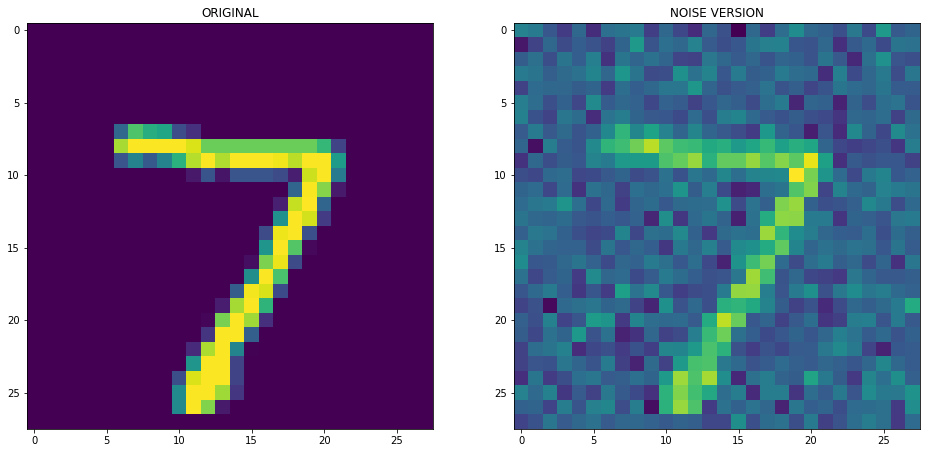

In [27]:
n = 0

fig,axs = plt.subplots(1,2,figsize = (16,8))
axs[0].imshow(X_test[n])
axs[0].set_title("ORIGINAL")

axs[1].imshow(noisy[n])
axs[1].set_title("NOISE VERSION")


Ahora crearemos un autoencoder nuevamente. Para no procesar antes las imágenes simplemente introduciremos una capa de ruido al inicio, este es lo mismo que decirle a la red que de la entrada es la imagen con ruido y a la salida lo que queremos es la imagen sin el ruido.

In [28]:
encoder = Sequential()
encoder.add(Flatten(input_shape = [28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation = "relu"))
encoder.add(Dense(200,activation = "relu"))
encoder.add(Dense(100,activation = "relu"))
encoder.add(Dense(50,activation = "relu"))
encoder.add(Dense(25,activation = "relu"))

In [29]:
decoder = Sequential()
decoder.add(Dense(50,input_shape =[25],activation = "relu"))
decoder.add(Dense(100,activation = "relu"))
decoder.add(Dense(200,activation = "relu"))
decoder.add(Dense(400,activation = "relu"))
decoder.add(Dense(784,activation = "sigmoid"))
decoder.add(Reshape([28,28]))

In [30]:
autoencoder = Sequential([encoder,decoder])

In [31]:
autoencoder.compile(loss="binary_crossentropy",
                    optimizer = SGD(lr=1.5),
                    metrics = ['accuracy'])

Nuevamente la entrada y salida de la red son lo mismo, sólo que en este caso a la entrada se le agregará el ruido gaussiano y a la salida se pedirá que salga limpia.

In [32]:
autoencoder.fit(X_train,X_train,epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2485 - accuracy: 0.0908
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1936 - accuracy: 0.1488
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1650 - accuracy: 0.1893
Epoch 4/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1539 - accuracy: 0.2046
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1466 - accuracy: 0.2154
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1419 - accuracy: 0.2224
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1368 - accuracy: 0.2274
Epoch 8/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1319 - accuracy: 0.2330
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1285 - accuracy: 0.2379
Epoch 10/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.126

Ahora tomemos 10 imagenes de nuestro set de test y agregemosle ruido, el objetivo es volver a reconstruir la imagen pero sin el ruido.

In [33]:
ten_noisy_images = sample(X_test[:10],training=True)

In [34]:
denoised = autoencoder.predict(ten_noisy_images)

Podemos ver que la imagen con ruido a la izquierda (a esta imagen se le volvió a agregar ruido dentro de la misma red!!). A la derecha es la imagen reconstruida, se puede ver que la red aprendió los detalles importantes para la reconstrucción y los valores del ruido los eliminó porque no eran escenciales para la reconstrucción de la imagen.

Text(0.5, 1.0, 'Attempted Reconstruction (after autoencoder)')

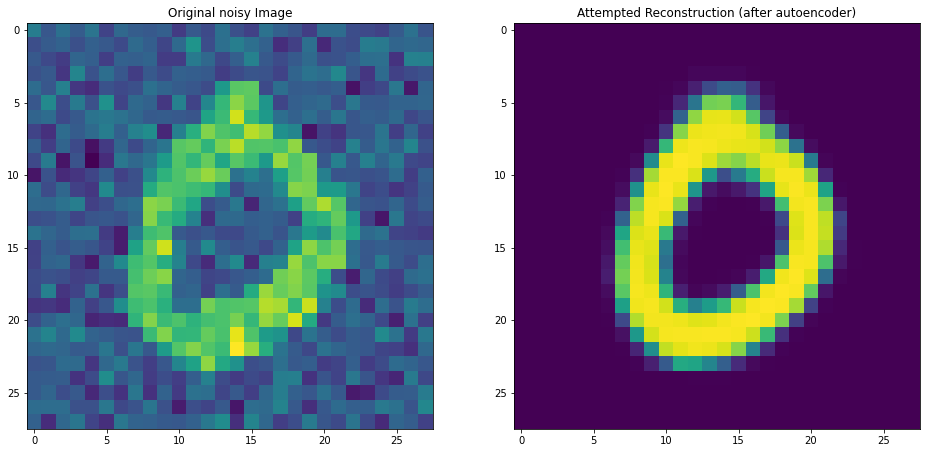

In [36]:
n = 3

fig,axs = plt.subplots(1,2,figsize = (16,8))
axs[0].imshow(ten_noisy_images[n])
axs[0].set_title("Original noisy Image")

axs[1].imshow(denoised[n])
axs[1].set_title("Attempted Reconstruction (after autoencoder)")

In [ ]:
autoencoder.summary()